In [1]:
import pandas as pd
import numpy as np  

In [10]:
df = pd.read_csv('C:/Users/admin/Desktop/Assignment_DataScience/EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
X = df.iloc[:,1:]
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
from sklearn.preprocessing import MinMaxScaler
mms_x = MinMaxScaler()
New_X = mms_x.fit_transform(X)
New_X

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# hierarchical

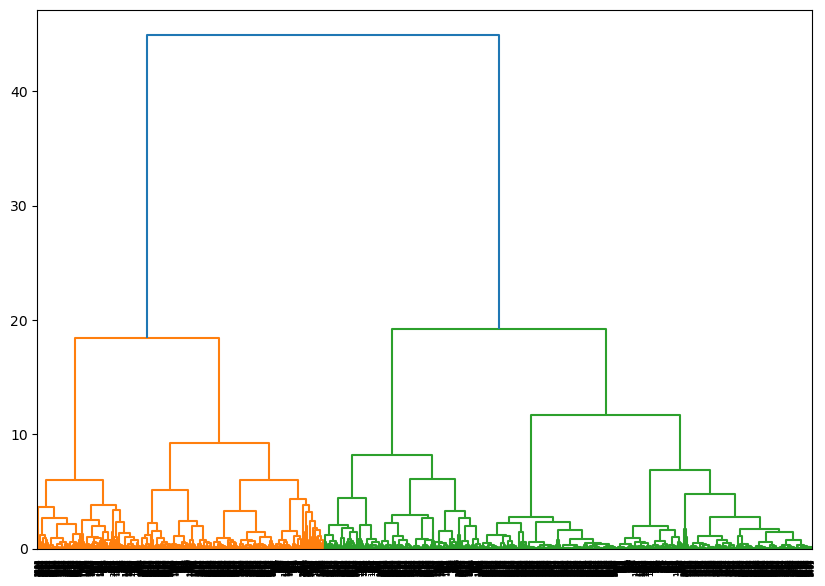

In [32]:
# Create Dendrograms
import matplotlib.pyplot as plt
import scipy.cluster .hierarchy as sch
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(New_X,method = 'ward'))

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y = cluster.fit_predict(X)
Y

array([2, 2, 2, ..., 4, 4, 2], dtype=int64)

In [43]:
Y_new = pd.DataFrame(Y)

In [44]:
Y_new[0].value_counts()

2    2185
4    1030
1     624
3     134
0      26
Name: 0, dtype: int64

# KMeans

In [47]:
from sklearn.cluster import KMeans

wcss =[]
for i in range (1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(New_X)
    wcss.append(km.inertia_)
    
print(wcss)

[1830.7932128584112, 823.6756984125207, 625.1684881570719, 436.7088576193262, 348.9434283901317, 315.14947378046105, 287.89506132579123, 263.05405039698616, 245.23903129004307, 228.48464004625396]


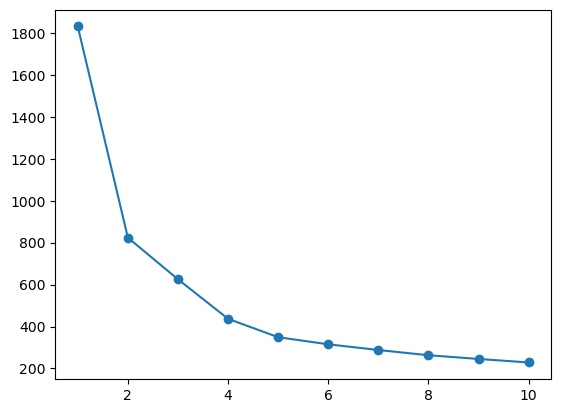

In [49]:
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss)

In [50]:
km = KMeans(n_clusters = 4)
Y = km.fit_predict(New_X)
Y

array([0, 0, 0, ..., 3, 0, 0])

In [53]:
Y = pd.DataFrame(Y)

In [54]:
Y[0].value_counts()

0    1891
3     808
1     673
2     627
Name: 0, dtype: int64

# DBSCAN

In [91]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.75, min_samples = 3)
dbscan.fit(New_X)

DBSCAN(eps=0.75, min_samples=3)

In [92]:
Y = dbscan.labels_
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [93]:
New_Y = pd.DataFrame(Y)


In [94]:
New_Y[0].value_counts()

0    2518
1    1481
Name: 0, dtype: int64

In [96]:
df = pd.concat([df,New_Y], axis = 1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,0
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
